## Finding Pairwise Correlations for DepMap (20Q2) Gene-Dependencies and Gene-Effects

In [29]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy.stats import pearsonr

In [3]:
dep = pd.read_csv("/home/annerer/Downloads/Achilles_gene_dependency.csv")

In [24]:
effect = pd.read_csv("/home/annerer/Downloads/Achilles_gene_effect.csv")

In [25]:
effect = effect.drop("DepMap_ID",1)

### New Vectorized Correlation Functions

In [154]:
def corr2_coeff(A, B):
    # Rowwise mean of input arrays & subtract from input arrays themeselves
    A_mA = A - A.mean()
    B_mB = B - B.mean()

    # Sum of squares across rows
    ssA = (A_mA**2).sum()
    ssB = (B_mB**2).sum()

    # Finally get corr coeff
    return np.dot(A_mA, B_mB.T) / np.sqrt(np.dot(ssA,ssB))

In [173]:
def vcorrcoef(X,y):
    Xm = X.mean()
    ym = y.mean()
    r_num = np.sum((X-Xm)*(y-ym))
    r_den = np.sqrt(np.sum((X-Xm)**2)*np.sum((y-ym)**2))
    r = r_num/r_den
    return r

In [174]:
vcorrcoef(df['TP53 (7157)'],df["MDM2 (4193)"])

-0.6967472861744265

In [ ]:
correlations = {}
for col_a, col_b in itertools.combinations(effect, 2):
    correlations[col_a + '__' + col_b] = vcorrcoef(effect[col_a],effect[col_b])

In [ ]:
result = pd.DataFrame.from_dict(correlations, orient='index')
pd.write_csv("effect_corr_pairs.csv",result)

potentially better version:

In [ ]:
# should not be needed, as the above version handles NaNs

correlations = {}
for col_a, col_b in itertools.combinations(effect, 2):
    nas = np.logical_or(np.isnan(df[col_a]), np.isnan(df[col_b]))
    correlations[col_a + '__' + col_b] = vcorrcoef(effect[col_a][~nas],effect[col_b][~nas])

Im web-interface von DepMap wird von Co-Dependencies gesprochen wenn
Korrelationen von Gene-Effect-Werten gemeint sind.

In [33]:
effect['RAN (5901)'].isnull().sum()

12

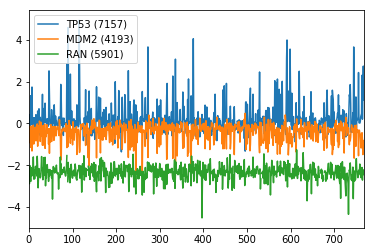

In [94]:
effect["TP53 (7157)"].plot()
effect["MDM2 (4193)"].plot()
effect["RAN (5901)"].plot()
plt.legend()
plt.savefig('comparrison_of_gene_effect_TP53_MDM2_RAN')

Korrelationsskript

In [89]:
correlations = {}
df = effect[['MDM2 (4193)','TP53 (7157)']]

for col_a, col_b in itertools.combinations(df, 2):
    nas = np.logical_or(np.isnan(df[col_a]), np.isnan(df[col_b]))
    corr = pearsonr(df[col_a][~nas], df[col_b][~nas])
    correlations[col_a + '__' + col_b] = corr

result = pd.DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']
result

In [4]:
df = effect

In [5]:
correlations = {}

for col_a, col_b in itertools.combinations(df, 2):
    corr = df[col_a].corr(df[col_b])
    correlations[col_a + '__' + col_b] = corr

result = pd.DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC']
print('done')
result.to_csv('corr_effect_pairs_full.csv')

done


In [2]:
result = pd.read_csv('corr_effect_pairs_full.csv')

In [4]:
result = result.rename(columns={'Unnamed: 0':'pairs','PCC':'PCC'})

In [5]:
result_sorted = result.sort_values('PCC')
result_sorted.to_csv('corr_effect_sorted.csv')

In [ ]:
result = pd.read_csv('corr_effect_sorted.csv')

In [22]:
length = len(result_sorted)
result_sorted[int(np.round(0.99999*length)):length]

,pairs,PCC
125324397,DHFR (1719)__PAICS (10606),0.596737
85356655,MRPL13 (28998)__MRPL20 (55052),0.596759
29190001,KIAA0391 (9692)__MTPAP (55149),0.596804
35194691,MRPL10 (124995)__MRPL20 (55052),0.596805
37877262,EARS2 (124454)__MRPL48 (51642),0.596828
146848600,COA6 (388753)__NDUFC2 (4718),0.596839
42773982,ACTR2 (10097)__ARPC3 (10094),0.596873
92900686,MRPL57 (78988)__RARS2 (57038),0.596889
67627356,MRPL13 (28998)__MRPL48 (51642),0.597127
87773035,MRPL21 (219927)__MRPS25 (64432),0.597128


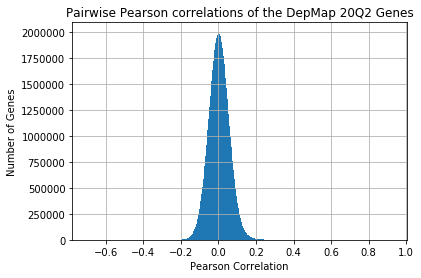

In [13]:
result_sorted['PCC'].hist(bins=1000)
plt.title("Pairwise Pearson correlations of the DepMap 20Q2 Genes")
plt.xlabel("Pearson Correlation")
plt.ylabel("Number of Genes")
plt.savefig('pairwise_pcc_geneEffects')

In [21]:
result_sorted.tail(16)

,Unnamed: 0,PCC
161015194,ATIC (471)__PAICS (10606),0.801942
20921063,STX4 (6810)__STXBP3 (6814),0.802871
144909796,NDUFB10 (4716)__NDUFC2 (4718),0.803928
126694239,TADA1 (117143)__TAF6L (10629),0.804453
48226052,PAGR1 (79447)__PAXIP1 (22976),0.805421
97975867,KIDINS220 (57498)__XPR1 (9213),0.807506
133444962,GART (2618)__PPAT (5471),0.812406
27007291,PAICS (10606)__PPAT (5471),0.823777
141505051,TADA1 (117143)__TADA2B (93624),0.830494
44592896,UBA5 (79876)__UFM1 (51569),0.834666


In [23]:
result_sorted.head(16)

,pairs,PCC
113341678,MDM2 (4193)__TP53 (7157),-0.696747
155868494,MDM2 (4193)__TP53BP1 (7158),-0.629534
105279445,PPM1D (8493)__TP53 (7157),-0.586922
107579520,ATM (472)__MDM2 (4193),-0.533031
109599044,CHEK2 (11200)__MDM2 (4193),-0.522001
121274633,CHEK2 (11200)__PPM1D (8493),-0.514137
37142314,PPM1D (8493)__TP53BP1 (7158),-0.513511
121661737,CDKN1A (1026)__MDM2 (4193),-0.510680
17646863,PTK2 (5747)__TAOK1 (57551),-0.502216
64701387,MDM2 (4193)__USP28 (57646),-0.487806


In [28]:
def find_correlates(gene_a,gene_b):
    """ takes 2 genes and returns the cell lines
    for which those two genes have a high correlation
    or anticorrelation in gene effect"""
    diff = np.abs(effect[gene_a] - effect[gene_b])
    summ = np.abs(effect[gene_a] + effect[gene_b])
    return (diff,summ) 

In [30]:
find_correlates("TP53","MDM2")

KeyError: 'TP53'

juergen mail
correlations and anticorrelations.

we want to compare the values (gene effects) for two genes 
in a variety of cancer cell lines and get the ones in which these
genes are highly correlated.
later on we look if there are certain genetic backgrounds that 
are enriched in this set.
how should we select a cutoff for the correlations.
uli proposed that we compute sums and differences and 
maximize sum for correlation and minimize distance,
as well as maximize distance for anticorrelations. 

there should be a simpler straightforward way to go,
however I thought it might be interesting to get your
input on this.

about the project:
Hättest du in den nächsten Wochen Zeit das
wir uns zusammensetzen?
Bzw hast du (MS) paper die ich lesen sollte um einen tieferen
einblick in die Materie zu bekommen?


In [75]:
df = pd.DataFrame(np.random.random((6, 6)), columns=[chr(i + ord('a')) for i in range(6)]) 
df['a'][3] = np.nan
df['b'][4] = np.nan
print(df)

          a         b         c         d         e         f
0  0.238729  0.836833  0.844553  0.673913  0.478680  0.622733
1  0.442589  0.560388  0.344260  0.724260  0.231331  0.568334
2  0.851465  0.515215  0.464266  0.561362  0.071919  0.180770
3       NaN  0.812376  0.695367  0.309487  0.826105  0.817678
4  0.846068       NaN  0.156010  0.346022  0.740878  0.211795
5  0.679405  0.830221  0.057410  0.083349  0.570318  0.862084


In [78]:
nas = np.logical_or(np.isnan(df['a']), np.isnan(df['b']))
df['a'][~nas]

0    0.238729
1    0.442589
2    0.851465
5    0.679405
Name: a, dtype: float64

In [ ]:
correlations = {}

for col_a, col_b in itertools.combinations(df, 2):
    nas = np.logical_or(np.isnan(df[col_a]), np.isnan(df[col_b]))
    corr = pearsonr(df[col_a][~nas], df[col_b][~nas])
    correlations[col_a + '__' + col_b] = corr

    
result = pd.DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']
result.to_csv('effect_pairs.csv')

In [73]:
myarray = np.array([1,2,3,4,5,6,7,8,9,10])
zipped_array = zip(myarray[::2], myarray[1::2])
list(zipped_array)

[(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]

### Get the shoulder from the sorted PCC DataFrame

### Pandas stellt die Importierten Daten nicht in ihrer vollen Laenge dar. Bei Berechnungen werden die 50+ Nachkommastellen jedoch verwendet

In [ ]:
#with pd.option_context('display.precision', 50):
#    print(dep['TP53 (7157)'].sort_values())

## Wichtiges Snippet. Berechnung der Korrelation wobei ich keinen Wert nehmen wenn einer der Partner NaN ist.

In [ ]:
#dep_corr = dep.corr()

for i in range(len(effect.columns)):    
    x, y = effect.iloc[ :,i].values,
    nas = np.logical_or(np.isnan(x), np.isnan(y))
    corr = pearsonr(x[~nas], y[~nas])
    correlation.append(corr)

In [10]:
print(dep['RAN (5901)'].isnull().sum())
print(dep['CDKN1A (1026)'].isnull().sum())
print(dep['MDM2 (4193)'].isnull().sum())

12
0
0


In [7]:
pearsonr(dep['TP53 (7157)'],dep['CDKN1A (1026)'])

(0.23544082592466523, 3.8041061892119593e-11)

In [9]:
pearsonr(dep['TP53 (7157)'],dep['MDM2 (4193)'])

(-0.3512264810233069, 9.590539022551798e-24)

In [95]:
#dep['MDM2 (4193)'].sort_values()

In [21]:
dep.shape

(769, 18119)

In [32]:
dep2 = dep

In [6]:
#dep = dep.drop('DepMap_ID',1)

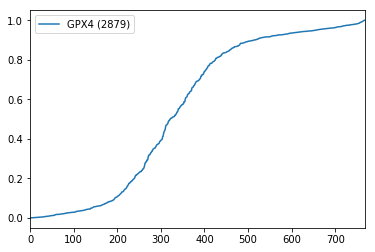

In [109]:
gpx = dep["GPX4 (2879)"].sort_values()
gpx = gpx.reset_index()
gpx = gpx.drop('index',1)
gpx.plot()

In [6]:
# the matrix
correlations = dep.corr()

In [4]:
sci.stats.pearsonr(dep['A2M (2)'][1:4],dep['A2M (2)'][1:4])

(1.0, 0.0)

In [7]:
#sci.stats.pearsonr(dep.columns.values,dep.columns.values)

In [38]:
#correlations[["A2M (2)"]].sort_values(by=['A2M (2)'])

## Test Data fuer die Korrelation

In [4]:
df = pd.DataFrame(np.random.random((6, 6)), columns=['gene_' + chr(i + ord('a')) for i in range(6)]) 
print(df)

     gene_a    gene_b    gene_c    gene_d    gene_e    gene_f
0  0.735955  0.400680  0.246593  0.913273  0.747246  0.791465
1  0.547346  0.072919  0.933062  0.232660  0.377221  0.343400
2  0.654725  0.641919  0.297961  0.912088  0.441782  0.587996
3  0.896772  0.286375  0.721536  0.371457  0.258281  0.909784
4  0.756991  0.024119  0.475772  0.969679  0.989577  0.244825
5  0.597021  0.679071  0.642593  0.648500  0.951326  0.211457


In [28]:
query = df.query('gene_a > gene_b').iloc[::,0:2]
query.index.to_list()

[0, 2, 5]

In [6]:
def get_conditions(df):
    # return row in which ga pairwise_correlation is higher than the average 
    result = df[(df.gene_a < df.gene_b) & (df.gene_a < df.gene_c) & (df.gene_a < df.gene_d)]
    return result.index.to_list()
    

In [7]:
get_conditions(df)

[5]

In [49]:
new = ['avana',"plana",0,'quana',1,'tana']
df = df.reindex(new, fill_value=0)

,level_0,index,gene_a,gene_b,gene_c,gene_d,gene_e,gene_f
avana,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
plana,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0,0,0.735955,0.400680,0.246593,0.913273,0.747246,0.791465
quana,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,1,0.547346,0.072919,0.933062,0.232660,0.377221,0.343400
tana,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [55]:
df = df.T
df.rename(columns={0:'atg',1:'pln'})

,atg,pln,2,3,4,5
level_0,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000
index,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000
gene_a,0.735955,0.547346,0.654725,0.896772,0.756991,0.597021
gene_b,0.400680,0.072919,0.641919,0.286375,0.024119,0.679071
gene_c,0.246593,0.933062,0.297961,0.721536,0.475772,0.642593
gene_d,0.913273,0.232660,0.912088,0.371457,0.969679,0.648500
gene_e,0.747246,0.377221,0.441782,0.258281,0.989577,0.951326
gene_f,0.791465,0.343400,0.587996,0.909784,0.244825,0.211457


check out biclustering.

find a way to return indices of relevant genes


In [20]:
data = pd.read_csv("/home/annerer/Downloads/sample_info.csv")

## Umbenennen der Zelllinien. 

siehe querrying depmap

In [21]:
mapping = {}

for i in np.arange(0,data.shape[0],1):
    mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

#mappign = data[['CCLE_Name','DepMap_ID']].to_dict()

In [121]:
dep = pd.read_csv("/home/annerer/Downloads/Achilles_gene_dependency.csv")

In [123]:
dep["new_index"] = dep.DepMap_ID
dep = dep.set_index('new_index')

In [124]:
dep = dep.rename(index=mapping)

password for phosphosite:

EfBGWYFFN8UtbAi

In [58]:
#df = pd.DataFrame(np.random.randn(10, 2), columns=list('ab'))
#df.query('a > b')

In [41]:
df = pd.DataFrame(np.random.random((6, 6)), columns=['gene_' + chr(i + ord('a')) for i in range(6)]) 
print(df)
df['gene_a'][3] = np.nan
df['gene_d'][4] = np.nan
df['gene_c'][2] = np.nan
df['gene_f'][1] = np.nan

     gene_a    gene_b    gene_c    gene_d    gene_e    gene_f
0  0.665301  0.869902  0.879890  0.169911  0.608579  0.341876
1  0.277930  0.497177  0.199557  0.956748  0.328038  0.248854
2  0.438563  0.367788  0.437718  0.481967  0.745440  0.861007
3  0.878028  0.214308  0.532944  0.560893  0.383670  0.271503
4  0.725735  0.719277  0.773572  0.248921  0.191922  0.422448
5  0.032156  0.146041  0.829202  0.918093  0.877938  0.340987


In [59]:
# !!!
correlations = {}

for col_a, col_b in itertools.combinations(df, 2):
    nas = np.logical_or(np.isnan(df[col_a]), np.isnan(df[col_b]))
    corr = pearsonr(df[col_a][~nas], df[col_b][~nas])
    correlations[col_a + '__' + col_b] = corr
# !!!

## Pairwise Gene Correlations DepMap 20Q2

todo:
for the gene interaction pairs
pair-correlation-scoreverteilung binnen und plotten. Unerwartete Bimodalitaet bzw tails?

dependency-matrix clustern. ?

wir nehmen die besten 15% der scores und 
nehmen die relevanten matrixteile als unsere
neue ausgangsmatrix.
diese sollte man nun durchsuchen koennen,
naemlich nach Gen-paaren. 
dh die matrix besteht aus conditions, die
unser output sind, und signifikanten gen-paaren.
conditions bleiben alle, wir beschneiden die
gene die wir drinlassen. 
frage: wie sehen wir die? wir haben die werte
ja von den gen-paaren, und jetzt eine matrix 
von genen und conditions.

   c c c c c c c c c 

g  1 0 0 0 0 0 0 0 0 

g  1 0 0 0 0 0 0 0 0


macht das sinn?
todo also:
how to efficiently rename colum names, for conditions.
if you can do that, i am still not sure if the same lines will mean anything. see if it works with the depmap and the avana data.

### 11.5 GB output file of Correlated Gene-Dependency (Probability of Depletion Effect) pairs. Calculated on Sauron Cluster of KFU.

In [28]:
corrs = pd.read_csv("/home/annerer/Dokumente/pairwise.csv")
corrs = corrs.rename(columns={'Unnamed: 0': 'pair','PCC':'PCC','p-value':'pvalue'})

In [31]:
(by="PCC")

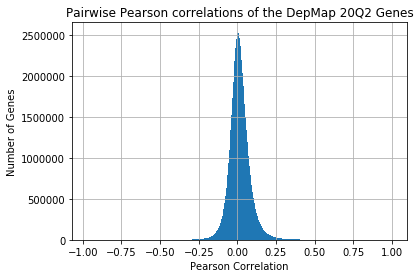

In [35]:
sorted_corrs['PCC'].hist(bins=1000)
plt.title("Pairwise Pearson correlations of the DepMap 20Q2 Genes")
plt.xlabel("Pearson Correlation")
plt.ylabel("Number of Genes")
plt.savefig('pcc_histogram')

In [133]:
#top_ten_percent = np.int(np.round(0.1*np.shape(sorted_corrs)[0]))

#sorted_corrs[['PCC']].nlargest(top_ten_percent)

In [28]:
top_ten_percent = np.int(np.round(0.1*np.shape(sorted_corrs)[0]))

16414002

In [22]:
np.shape(sorted_corrs)

(164140021, 3)

In [5]:
#sorted_corrs[(sorted_corrs.pvalue > 0.7) & (sorted_corrs.p-value < 0.8)]

In [14]:
pearsonr(dep['RFX8 (731220)'].fillna(0),dep["TBC1D8 (11138)"].fillna(0))

(0.27689410232627454, 5.307131873700017e-15)

In [15]:
pearsonr(dep['RFX8 (731220)'],dep["TBC1D8 (11138)"])

(0.27689410232627454, 5.307131873700017e-15)

In [16]:
pearsonr(dep['RFX8 (731220)'],dep["TGOLN2 (10618)"])

(0.16009665331919112, 8.150190010166789e-06)

In [7]:
corrs = corrs.rename(columns={'Unnamed: 0': 'pair','PCC':'PCC','p-value':'pvalue'})

In [6]:
#corrs[corrs.pair.str.match('A2M')]

In [55]:
#pearsonr(dep['RFXAP (5994)'].fillna(0),dep["ZUP1 (221302)"].fillna(0))

In [50]:
gene = dep.columns.to_list()
#gene

In [51]:
gene.pop(0)
#gene

'DepMap_ID'

In [31]:
# split at space
for i in range(len(gene)):
    gene[i] = gene[i].split(" ")
    

In [38]:
#gene
genes = []

for i in range(len(gene)):
    genes.append(gene[i][0])

In [40]:
len(genes)
'C8orf33' in genes

18119

In [41]:
data = pd.read_csv('/home/annerer/Downloads/elife-58925-supp2-v3.txt')

In [45]:
data = data["DMKN"].to_list()

In [7]:
# using sets to compare the lists
'''
list1 = genes
list2 = data
intersection_set = set.intersection(set(list1), set(list2))
# find intersection of list1 and list2
intersection_list = list(intersection_set)
print(intersection_list)
'''

'\n\nlist1 = genes\n\nlist2 = data\n\nintersection_set = set.intersection(set(list1), set(list2))\n\n# find intersection of list1 and list2\n\nintersection_list = list(intersection_set)\n\nprint(intersection_list)\nprint(len(intersection_list))\nprint(len(data))\n'

# Querrying the Co-Dependencies for the Cell Lines they occur in

fuer eine etwaige suche wuerde ich in Pandas die Indexe, die ich 
in Zelllinien-Namen umbenannt habe ausgebe fuer Paare in denen die Co-Dependency hoch ist. 
Dh ich habe eine Matrix. Gegeben ein Wert in einer Spalte ist hoch - gib den Index (die Zelllinie) aus. Wenn ein Wert in einer Spalte einer Co-Dependency entspricht sollte es so funktionieren.

## If this is done, the results could be checked against the genome to find if it is an oncogene addiction or not.

which files do we need for the genomes?
how do we best display them?


gives a nice overview of things i am interested in the project lab work.
relates to the big pictures systems biology context. 
good for raising awareness how many sources of errors there are.

finding new therapies for cancer.
SLIs and why RNAi and potentially also CRISPR does not deliver yet.
penetrance.

appear stable in a variety of genetic backgrounds -> high penetrance
only in very specific context -> soft penetrance

so the important factors are penetrance, 3d effects, rescue effects,
robustness (of phenotype, but in general), 



## Structure
### The Search for Synthetic Lethality in Cancer


The Problem with Synthetic Lethality: Incomplete Penetrance
 Reasons for Incomplete Penetrance
Cell Type-Specific Networks
Genetic and Epigenetic Heterogeneity




#### Experimental Approaches to Identify Highly Penetrant SLIs


#### Using Computational Approaches That Identify Highly Penetrant SLIs
##### Filtering by Using Prior Knowledge
##### Modelling Approaches To Predict SLIs
##### Extending the Applications of Highly Penetrant SLIs 
##### Using Guilt by Association

2D or Not 2D


## 5 characteristics of SLIs

Characteristic 1 – Inhibited Process Must Be Broadly Essential

Characteristic 2 – Genes Involved Must Function in Related Pathways

Characteristic 3 – Targeted Genes Must Not Have Highly Cell Type-Specific Functions

Characteristic 4 – Target Genes Should Have Few Close Paralogs

Characteristic 5 – SLIs Should Be Conserved Across Species

## Open Questions

Which biological principles determine
whether a synthetic lethal effect has
complete or incomplete penetrance?

Can these principles be determined
and used to predict highly penetrant
synthetic lethal effects?

Can model organisms (yeast, flies,
worms, mice) aid the identification of
highly penetrant SLIs? If so, which
models are most useful?

Can refined isogenic systems be
developed that better model the spectrum of mutations present in human
tumours?

Can methods be developed that allow
high-throughput perturbation screens
to be performed in vivo at a similar
scale to in vitro perturbation screens?

Can computational approaches replace
or complement empirical approaches
for defining the penetrance of synthetic
lethal effects?

o) stromal synthetic rescue

o) 3d synthetic rescue effects

o) robustness

o) Synthetic lethal penetrance: the
fraction of tumour cell clones with a
specific genetic alteration (e.g., a
cancer driver gene mutation) that
undergo cell death when an
associated synthetic lethal target is
inhibited

In [10]:
ulidata = pd.read_csv("/home/annerer/Downloads/TP53_MDM4.csv")
ulidata = ulidata['cellline'].to_list()

result = []


for _ in ulidata:
    result.append(mapping[_])
    
cellLine = result
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cell_L = []
for i in range(len(cellLine)):
    cell_L.append(cellLine[i][0])

In [27]:
ulidata = ulidata['cellline'].to_list()

In [28]:
result = []

for _ in ulidata:
    result.append(mapping[_])

In [46]:
#result

In [41]:
cellLine = result
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines3 = []
for i in range(len(cellLine)):
    cellLines3.append(cellLine[i][0])

AttributeError: 'list' object has no attribute 'split'

In [45]:
new_ceL =cellLines

In [7]:
#list1 = data[data.TP53_mut_del == 1]["CCLE_NAME"].to_list()
#overlap = set.intersection(set(list1),set(cellLines))

In [ ]:
def find_correlates(gene_a,gene_b):
""" takes 2 genes and returns the cell lines
for which those two genes have a high correlation
or anticorrelation in gene effect"""

    for cola,colb in enumerate(df,2):
        diff = np.abs(cola - colb)
        summ = np.abs(cola - colb)
    